In [383]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import math
import prettytable as pt
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import normalize,StandardScaler,PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
from sklearn.pipeline import make_pipeline

## a.Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + N 

### Use uniform distribution between 0 and 1 for X

In [384]:
x = np.random.uniform(0,1,20)
print(x)

[0.46816138 0.81260763 0.53167767 0.25260557 0.58802082 0.47352964
 0.98700419 0.13361767 0.74160105 0.30267225 0.89268579 0.92167238
 0.18360513 0.72098544 0.17828168 0.80131587 0.41420332 0.20550569
 0.29345683 0.15668689]


### Sample N from the normal gaussian distribution

In [385]:
N = np.random.normal(loc=0,scale=0.2,size=20)
print(N)

[ 0.13424155 -0.17073744  0.13957444 -0.07598915  0.05775977 -0.14414246
  0.21090162 -0.0198345  -0.2369446   0.04006359 -0.01074224 -0.10511392
 -0.10931209  0.21850937  0.04075384  0.05958942 -0.22693519  0.34731486
 -0.13908261  0.05577731]


### using y = sin(2\*pi\*X) + N for y

In [386]:
y = 2*math.pi*x
for i in range(20):
    y[i] = math.sin(y[i])+ N[i]
print(y)

[ 0.33295785 -1.09435797 -0.05815065  0.92387684 -0.46752617  0.02141002
  0.12933724  0.72450458 -1.23555247  0.98579782 -0.63507343 -0.57763305
  0.80492665 -0.76491926  0.94093131 -0.88887972  0.28640844  1.30849015
  0.823871    0.88876885]


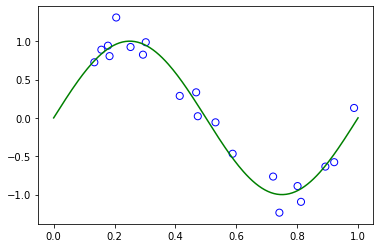

In [387]:
x_s = np.linspace(0,1,200)
y_s = 2*math.pi*x_s
for i in range(200):
    y_s[i] = math.sin(y_s[i])  
plt.scatter(x, y, color='', marker='o', edgecolors='b', s=50)
plt.plot(x_s, y_s, "g-")

### Use 10 for train and 10 for test 

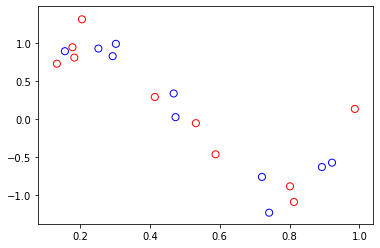

In [388]:
X_train,X_test, Y_train, Y_test =model_selection.train_test_split(x, y, test_size=0.5, random_state=3)
plt.scatter(X_train, Y_train, color='', marker='o', edgecolors='b', s=50)
plt.scatter(X_test, Y_test, color='', marker='o', edgecolors='r', s=50)

## b.Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9

In [389]:
def  polynomial(i:int ) :
    poly = PolynomialFeatures(degree = i)
    model = make_pipeline(StandardScaler(), poly, Ridge(alpha=0, fit_intercept=True, solver='svd'))
    model.fit(X_train[:, np.newaxis], Y_train)
    return poly, model

train_error = [0]*10
test_error = [0]*10
def getTraninErrorAndTestError(i:int,  model) :
    rmse_train = model.predict(X_train[:, np.newaxis])
    rmse_test = model.predict(X_test[:, np.newaxis])
    train_error[i] = math.sqrt(mean_squared_error(Y_train, rmse_train))
    test_error[i] = math.sqrt(mean_squared_error(Y_test, rmse_test))

In [390]:
weights = {}
orders = [0, 1, 3, 9]
for j in orders :
    tmp = [""]*10
    poly, model = polynomial(j) 
    weight = [model.steps[2][1].intercept_.tolist()]
    weight.extend(model.steps[2][1].coef_[1:].tolist())
    for i in range(len(weight)) :
        tmp[i] = round(weight[i],2)
    weights[str(j)] = tmp
weights

{'0': [0.08, '', '', '', '', '', '', '', '', ''],
 '1': [0.08, -0.72, '', '', '', '', '', '', '', ''],
 '3': [-0.12, -1.45, 0.09, 0.45, '', '', '', '', '', ''],
 '9': [-2.77,
  -12.79,
  21.43,
  43.96,
  -42.09,
  -57.17,
  28.29,
  28.59,
  -6.15,
  -4.71]}

## c.Display weights in table 

In [391]:
tb= PrettyTable()
tb.add_column("", ["w0","w1","w2","w3","w4","w5","w6","w7","w8","w9"])
tb.add_column("M = 0", weights["0"])
tb.add_column("M = 1", weights["1"])
tb.add_column("M = 3", weights["3"])
tb.add_column("M = 9", weights["9"])
print(tb)

+----+-------+-------+-------+--------+
|    | M = 0 | M = 1 | M = 3 | M = 9  |
+----+-------+-------+-------+--------+
| w0 |  0.08 |  0.08 | -0.12 | -2.77  |
| w1 |       | -0.72 | -1.45 | -12.79 |
| w2 |       |       |  0.09 | 21.43  |
| w3 |       |       |  0.45 | 43.96  |
| w4 |       |       |       | -42.09 |
| w5 |       |       |       | -57.17 |
| w6 |       |       |       | 28.29  |
| w7 |       |       |       | 28.59  |
| w8 |       |       |       | -6.15  |
| w9 |       |       |       | -4.71  |
+----+-------+-------+-------+--------+


## d.Draw a chart of fit data

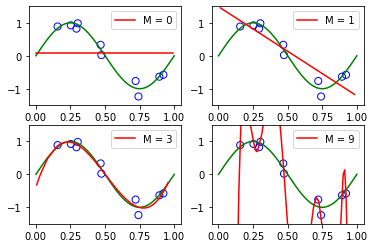

In [392]:
ax={}
plt.figure(1)
ax[0] = plt.subplot(2,2,1)
ax[1] = plt.subplot(2,2,2)
ax[3] = plt.subplot(2,2,3)
ax[9] = plt.subplot(2,2,4)
for j in orders :
    poly, model = polynomial(j)
    x_plt = np.random.uniform(0, 1, 100)
    x_plt.sort()
    y_plt = model.predict(x_plt[:, np.newaxis])
    ax[j].plot(x_s, y_s, "g-")
    ax[j].plot(x_plt, y_plt, "r-",label='M = '+str(j))
    ax[j].legend(loc='upper right')
    ax[j].scatter(X_train, Y_train, color='', marker='o', edgecolors='b', s=50)
    plt.sca(ax[j])
    plt.ylim(-1.5 ,1.5)
plt.show()

## e.Draw train error vs test error

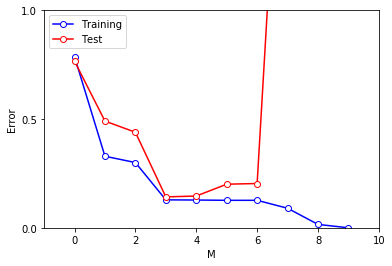

In [393]:
for degree in range(10):
    poly, model = polynomial(degree)
    getError(degree, model)
x_plot = np.linspace(0, 9, 10)
plt.ylim(0 ,1)
plt.xlim(-1,10)
my_y_ticks = np.arange(0, 1.1, 0.5)
plt.yticks(my_y_ticks)
plt.plot(x_plot, train_error, label = "Training", c = 'b',marker='o', mec='b', mfc='w')
plt.plot(x_plot, test_error, label = "Test", c = 'r', marker='o', mec='r', mfc='w')
plt.ylabel('Error')
plt.xlabel('M')
plt.legend(loc='upper left')

## f.Now generate 100 more data and fit 9th order model and draw fit

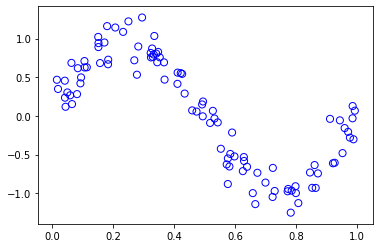

In [394]:
x_hundred = np.random.uniform(0,1,100)
x_hundred.sort()
y_hundred = 2*math.pi*x_hundred
N_hundred = np.random.normal(loc=0,scale=0.2,size=100)
for i in range(100):
    y_hundred[i] = math.sin(y_hundred[i])+ N_hundred[i]
plt.scatter(x_hundred, y_hundred, color='', marker = "o",edgecolors= "b", s=50)

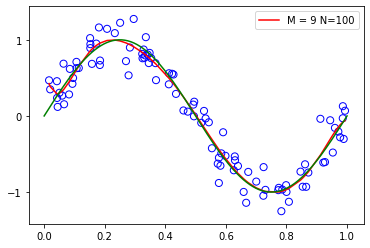

In [395]:
poly = PolynomialFeatures(degree = 9)
model = make_pipeline(StandardScaler(), poly, Ridge(alpha=0, fit_intercept=True, solver='svd'))
model.fit(x_hundred[:, np.newaxis], y_hundred)
my_y_ticks = np.arange(-2, 2, 1)
plt.yticks(my_y_ticks)
y_plot = model.predict(x_hundred[:, np.newaxis])
plt.plot(x_hundred, y_plot,label="M = 9 N=100", c = 'r')
plt.plot(x_s, y_s, "g-")
plt.scatter(x_hundred, y_hundred, color='', marker = "o",edgecolors= "b", s=50)
plt.legend()

## g.Now we will regularize using the sum of weights. 

In [396]:
def regularize(value):
    if value < 0: value = math.exp(value)
    poly = PolynomialFeatures(degree = 9)
    transformed = poly.fit_transform(X_train.reshape(10,1))
    model = Ridge(alpha = value)
    model.fit(transformed, Y_train)
    return poly, model

## h.Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

In [397]:
def drawChart(value):
    poly, model = regularize(value)
    x_plot = np.random.uniform(0, 1, 100)
    x_plot.sort()
    transformed = poly.fit_transform(x_plot.reshape(100,1))
    y_plot = model.predict(transformed)
    plt.plot(x_plot, y_plot,label="λ = "+str(value), c = 'r')
    plt.plot(x_s, y_s, "g-")
    plt.scatter(X_train, Y_train, color='', marker = "o",edgecolors= "b", s=50)
    my_y_ticks = np.arange(-2, 2, 1)
    plt.yticks(my_y_ticks)
    plt.ylim(-1.5 ,1.5)
    my_x_ticks = np.arange(0, 1.1, 0.5)
    plt.xticks(my_x_ticks)
    plt.xlim(-0.05 ,1.05)
    plt.legend()

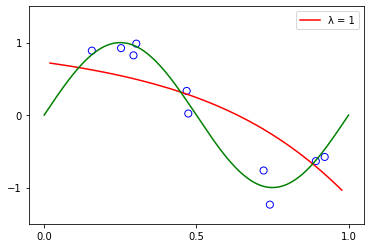

In [398]:
drawChart(1)

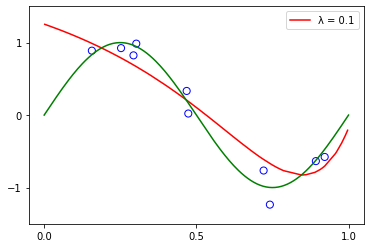

In [399]:
drawChart(0.1)

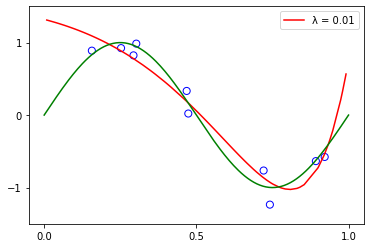

In [400]:
drawChart(0.01)

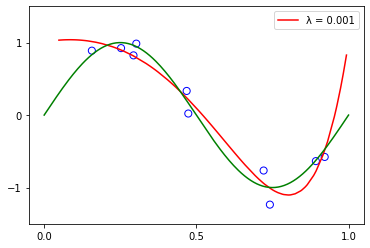

In [401]:
drawChart(0.001)

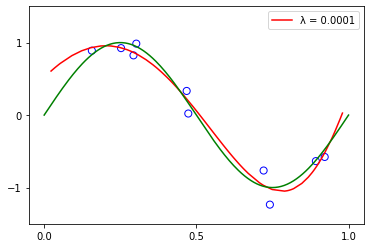

In [402]:
drawChart(0.0001)

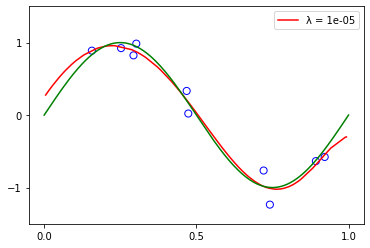

In [403]:
drawChart(0.00001)

## i. Draw test  and train error according to lamda 

In [404]:
train_error_lamda = np.zeros(34)
test_error_lamda = np.zeros(34)
lamda_value = list(range(-34, 0))
for value in lamda_value:
    poly, model = regularize(value)
    train_transformed = poly.fit_transform(X_train.reshape(X_train.shape[0], 1))
    test_transformed = poly.fit_transform(X_test.reshape(X_test.shape[0], 1))
    y_train_plot = model.predict(train_transformed)
    y_test_plot = model.predict(test_transformed)
    train_error_lamda[value] = math.sqrt(mean_squared_error(Y_train, y_train_plot))
    test_error_lamda[value] = math.sqrt(mean_squared_error(Y_test, y_test_plot))

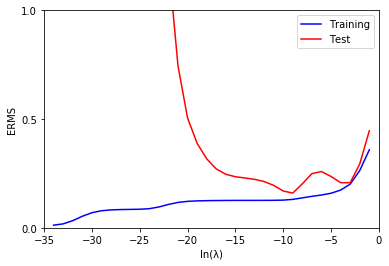

In [405]:
plt.ylim(0 ,1)
my_y_ticks = np.arange(0, 1.1, 0.5)
plt.yticks(my_y_ticks)
plt.xlim(-35,0)
plt.plot(lamda_value, train_error_lamda, label = "Training", c = 'b')
plt.plot(lamda_value, test_error_lamda, label = "Test", c = 'r')
plt.xlabel('ln(λ)')
plt.ylabel('ERMS')
plt.legend()

## j.Based on the best test performance, what is your model? 

In [406]:
for value in range(-34,0):
    if test_error_lamda[value+34] == test_error_lamda.min():
        best = math.exp(value)
        print("Based on the best test performance, the model parameter are:")
        print("best λ = ", best)
        print("best ln(λ) = ", value)
        break


Based on the best test performance, the model parameter are:
best λ =  0.00012340980408667956
best ln(λ) =  -9
